In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
np.random.seed(777)

font_sigmetric = 'libertine'
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.preamble']='\\usepackage{{}}'.format(font_sigmetric)

In [2]:
import seaborn as sns
sns.set(context='notebook', style='darkgrid', palette='bright', font_scale=1.9, color_codes=True)

In [3]:
# Simulation can be rerun by:
# 1. removing benchmarks/benchmarks_kka.csv
# 2. launching the script run_benchmarks.py 

# this load the saves results:
df = pd.read_csv('benchmarks/benchmarks_kka.csv')
df = df.filter(items=['N','check_indexability','number_of_updates','run_time'])
df2 = df.groupby(['N','check_indexability','number_of_updates']).mean()
df3 = df2.unstack(0)['run_time']
run_times = df3.to_numpy()
N = np.unique(np.sort(df['N'].to_numpy()))[3:]
df3

N                                        10        100       500       1000   \
check_indexability number_of_updates                                           
0                  0                  0.000413  0.004379  0.033064  0.189742   
                   2n**0.1            0.000505  0.005096  0.044188  0.215338   
1                  0                  0.000541  0.006087  0.043456  0.233584   
                   2n**0.1            0.000598  0.006960  0.051930  0.238233   

N                                        2000      3000       4000   \
check_indexability number_of_updates                                  
0                  0                  1.240759  5.009522  12.354046   
                   2n**0.1            0.989195  2.627971   5.916246   
1                  0                  1.905163  7.247885  17.493798   
                   2n**0.1            1.062542  3.224728   7.594207   

N                                         5000       6000       7000   \
check_indexability number_of_updates                                    
0                  0                  25.157346  43.124010  67.903062   
                   2n**0.1            12.167335  20.422887  32.554302   
1                  0                  34.397178  60.228899  95.433995   
                   2n**0.1            15.974493  26.713528  41.717363   

N                                          8000        9000        10000  \
check_indexability number_of_updates                                       
0                  0                   99.340277  141.425695  191.153267   
                   2n**0.1             49.306452   69.976683   95.268719   
1                  0                  141.588127  199.429617  274.646365   
                   2n**0.1             63.203794   91.696841  121.713119   

N                                          11000       12000       13000  \
check_indexability number_of_updates                                       
0                  0                  257.379662  339.105431  427.526749   
                   2n**0.1            132.965816  190.406273  242.951064   
1                  0                  360.620222  470.572947  620.464762   
                   2n**0.1            164.323840  225.274325  285.789876   

N                                          14000       15000  
check_indexability number_of_updates                          
0                  0                  553.314617  685.471475  
                   2n**0.1            317.107351  440.077847  
1                  0                  790.093872  965.260117  
                   2n**0.1            407.639639  500.577784

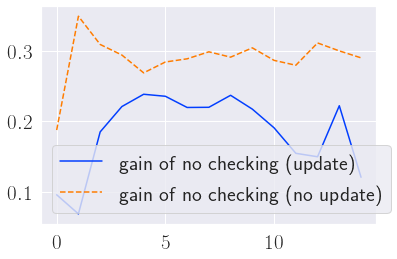

In [4]:
no_update_no_check = df3.loc[[(0,'0')]].to_numpy()[0][3:]
no_update_check = df3.loc[[(1,'0')]].to_numpy()[0][3:]
update_no_check = df3.loc[[(0,'2n**0.1')]].to_numpy()[0][3:]
update_check = df3.loc[[(1,'2n**0.1')]].to_numpy()[0][3:]

ours = np.array([N, no_update_check, no_update_no_check, update_check, update_no_check]).transpose()
plt.plot(1 - update_no_check / update_check, label='gain of no checking (update)')
plt.plot(1 - no_update_no_check / no_update_check, '--', label='gain of no checking (no update)')
plt.legend()

In [5]:
#print("Total time of simulations = {:1.1f}h".format(np.sum(ours[:,1:]) / 3600))
#print("-> decomposed in for [no check / check / 5 updates ]:", np.sum(ours[:,1:], 0)/3600)
nino_mora = np.loadtxt('benchmarks/nino_mora')
Nnn = nino_mora[:,0]

In [6]:
df_inverse = pd.read_csv('benchmarks/benchmark_inverse_kka.csv')
df_inverse = df_inverse.groupby(['n']).mean()
inverse = df_inverse[df_inverse.columns[0]].values

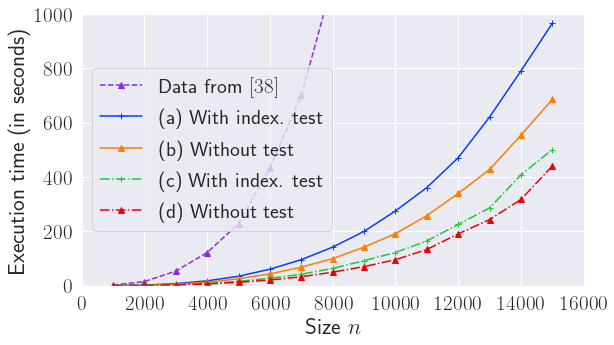

In [7]:
plt.figure(figsize=(9,5))
plt.plot(Nnn, nino_mora[:,1], 'm^--', label=r"Data from $[38]$")
plt.plot(N, no_update_check, '+-', label='(a) With index. test')
plt.plot(N, no_update_no_check, '^-', label='(b) Without test')
plt.plot(N, update_check, '+-.', label='(c) With index. test')
plt.plot(N, update_no_check, '^-.', label='(d) Without test')
plt.ylim(0,1000)
plt.xlim(0,16000)
plt.xlabel('Size $n$')
plt.ylabel('Execution time (in seconds)')
plt.legend(loc='center left')
plt.savefig('../figures/runtime_algorithms.pdf', bbox_inches="tight")

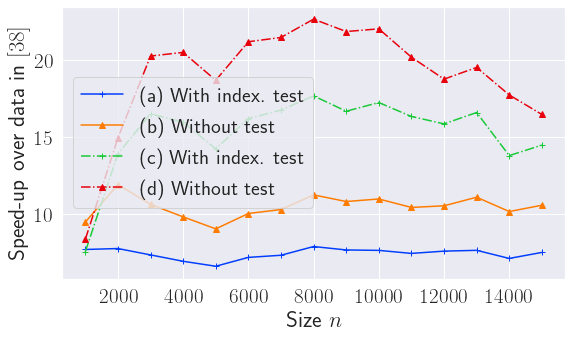

In [8]:
plt.figure(figsize=(9,5))
plt.plot(N, nino_mora[:len(N),1] / no_update_check, '+-', label='(a) With index. test')
plt.plot(N, nino_mora[:len(N),1] / no_update_no_check, '^-', label='(b) Without test')
plt.plot(N, nino_mora[:len(N),1] / update_check, '+-.', label='(c) With index. test')
plt.plot(N, nino_mora[:len(N),1] / update_no_check, '^-.', label='(d) Without test')
plt.xlabel('Size $n$')
plt.ylabel(r'Speed-up over data in $[38]$')
plt.legend(loc='center left')
plt.savefig('../figures/speedup.pdf', bbox_inches="tight")

## Improvement factor between testing and not testing indexability

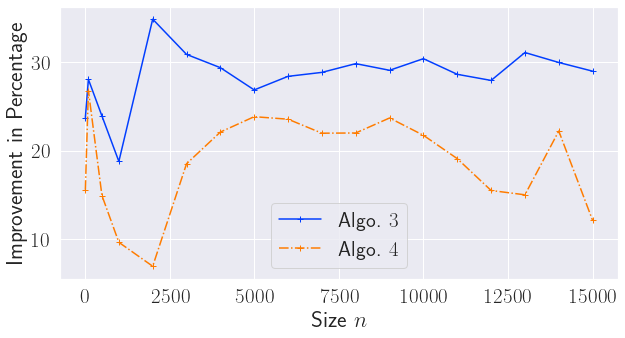

In [22]:
plt.figure(figsize=(10,5))
plt.plot(N, 100*(1.0 - (no_update_no_check / no_update_check)), '+-', label=r'Algo. $3$')
plt.plot(N, 100*(1.0 - (update_no_check / update_check)), '+-.', label=r'Algo. $4$')
plt.xlabel('Size $n$')
plt.ylabel(r'Improvement in Percentage')
plt.legend()

## Improvement factor between Algorithm 3 and Algorithm 4

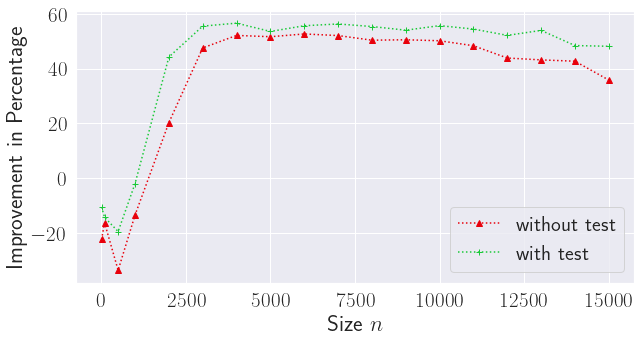

In [23]:
plt.figure(figsize=(10,5))
plt.plot(N, 100*(1.0 - (update_no_check / no_update_no_check)), '^:', label='without test', color='r')
plt.plot(N, 100*(1.0 - (update_check / no_update_check)), '+:', label='with test', color='g')
plt.xlabel('Size $n$')
plt.ylabel(r'Improvement in Percentage')
plt.legend()

In [31]:
for i, line in enumerate(ours):
    if i <= 4:
        print('{:5d} & {:5.3f} & {:5.3f} & {:5.3f} & {:5.3f} \\\\'.format(int(line[0]), line[1],line[2],  line[3], line[4]))
    else:
        print('{:5d} & {:5.0f} & {:5.0f} & {:5.0f} & {:5.0f} \\\\'.format(int(line[0]), line[1], line[2], line[3], line[4]))
np.set_printoptions(precision=0)
print('\nreduction of computation time when we do not test (in %)')
print('   for subcubic', 100-100*ours[:,-1]/ours[:,-2])
print('   for O(n^3)', 100-100*ours[:,2]/ours[:,1])
np.set_printoptions(precision=5)


   10 & 0.001 & 0.000 & 0.001 & 0.001 \\
  100 & 0.006 & 0.004 & 0.007 & 0.005 \\
  500 & 0.043 & 0.033 & 0.052 & 0.044 \\
 1000 & 0.234 & 0.190 & 0.238 & 0.215 \\
 2000 & 1.905 & 1.241 & 1.063 & 0.989 \\
 3000 &     7 &     5 &     3 &     3 \\
 4000 &    17 &    12 &     8 &     6 \\
 5000 &    34 &    25 &    16 &    12 \\
 6000 &    60 &    43 &    27 &    20 \\
 7000 &    95 &    68 &    42 &    33 \\
 8000 &   142 &    99 &    63 &    49 \\
 9000 &   199 &   141 &    92 &    70 \\
10000 &   275 &   191 &   122 &    95 \\
11000 &   361 &   257 &   164 &   133 \\
12000 &   471 &   339 &   225 &   190 \\
13000 &   620 &   428 &   286 &   243 \\
14000 &   790 &   553 &   408 &   317 \\
15000 &   965 &   685 &   501 &   440 \\

reduction of computation time when we do not test (in %)
   for subcubic [16. 27. 15. 10.  7. 19. 22. 24. 24. 22. 22. 24. 22. 19. 15. 15. 22. 12.]
   for O(n^3) [24. 28. 24. 19. 35. 31. 29. 27. 28. 29. 30. 29. 30. 29. 28. 31. 30. 29.]


In [19]:
total_time/3600

2.8950719354266212